In [2]:
# 우선 복습부터
import cv2
import numpy as np
import sys

In [5]:
src = cv2.imread('./fig/puppy.bmp')

M = np.array([[1, 0, 0],
              [0, 1, 0]], np.float32)

# (0, 0)은 동영상 크기 그대로 사용한다는 의미
dst = cv2.warpAffine(src, M, (0, 0)) 
# 비율로 확배하는 법
dst_resize = cv2.resize(src, (0, 0), None, fx = 2, fy = 2, interpolation = cv2.INTER_NEAREST)

h, w = src.shape[:2]
cp = (w/h, h/2)
M_rotation = cv2.getRotationMatrix2D(cp, 20, 1)
dst_rotation = cv2.warpAffine(src, M_rotation, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_resize', dst_resize)
cv2.imshow('dst_rotation', dst_rotation)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
import sys
import numpy as np
import cv2


src = cv2.imread('fig/checkerboard.png')

if src is None:
    print('Image load failed!')
    sys.exit()


h, w = src.shape[:2]

srcQuad = np.array([[217, 50], [691, 47], [830, 517], [67, 526]], np.float32)
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
src = cv2.imread('./fig/blue_eyes.png')

kernel_3 = np.ones((3, 3), np.float32)/9.
kernel_5 = np.ones((3, 3), np.float32)/25.

dst3 = cv2.filter2D(src, -1, kernel_3)
dst5 = cv2.filter2D(src, -1, kernel_5)

dst_blur = cv2.blur(src, (11, 11))
dst_Gaussian = cv2.GaussianBlur(src, (0, 0), 1) 
dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
cv2.imshow('dst3', dst3)
cv2.imshow('dst5', dst5)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_Gaussian', dst_Gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)


cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
src = cv2.imread('./fig/field.bmp')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

v_equal = cv2.equalizeHist(v)
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)

src_equal = cv2.merge((h, s, v_equal))
src_norm = cv2.merge((h, s, v_norm))

src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)
src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_equal', src_equal)
cv2.imshow('src_norm', src_norm)

cv2.waitKey()
cv2.destroyAllWindows()

In [1]:

def call_track(pos):
    hmin = cv2.getTrackbarPos('min', 'src')
    hmax = cv2.getTrackbarPos('max', 'src')
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('src', dst)

src = cv2.imread('./fig/palette_round.jpg')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('src', src)
cv2.createTrackbar('min', 'src', 50, 179, call_track)
cv2.createTrackbar('max', 'src', 80, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined

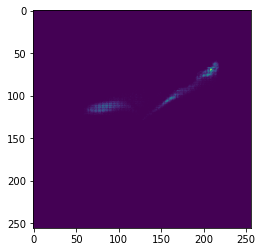

In [4]:
# 우선 복습부터
import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt

src = cv2.imread('./fig/green.png', cv2.IMREAD_REDUCED_COLOR_4)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
x, y, w, h = cv2.selectROI(src)
crop = src_ycrcb[y:y+h, x:x+w]
channels = [1, 2]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([crop], channels, None, [256, 256], ranges)
backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)

plt.imshow(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()


In [5]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
        
out = cv2.VideoWriter('output.avi', fourcc, fps, (200, 100))

while True:
        ret, frame = cap.read()
        
        if not ret:
            print('frame read failed')
            break
        
        cv2.imshow('frame', frame)
        
        key = cv2.waitKey(30)
        if key == 27 or key == ord('q'): 
            break
        
cap.release()
out.release()
cv2.destroyAllWindows()


frame read failed


In [4]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print(x, y)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
        
out = cv2.VideoWriter('output.avi', fourcc, fps, (200, 100))



while True:
        ret, frame = cap.read()
        
        if not ret:
            print('frame read failed')
            break
        
        cv2.imshow('frame', frame)
        cv2.setMouseCallback('frame', call_mouse, frame)
        
        key = cv2.waitKey(30)
        if key == 27 or key == ord('q'): 
            break
        
cap.release()
out.release()
cv2.destroyAllWindows()


402 142
361 144
158 328
103 332
104 332
106 332
108 332
110 331
112 330
112 330
112 330
112 330
112 330
112 330
243 178
